In [1]:
import pandas as pd 
data = pd.read_csv('ipldata.csv')
print(data.head())

   match_id           date                                         venue  \
0         1  March 26,2022                      Wankhede Stadium, Mumbai   
1         2  March 27,2022                     Brabourne Stadium, Mumbai   
2         3  March 27,2022            Dr DY Patil Sports Academy, Mumbai   
3         4  March 28,2022                      Wankhede Stadium, Mumbai   
4         5  March 29,2022  Maharashtra Cricket Association Stadium,Pune   

       team1      team2  stage toss_winner toss_decision  first_ings_score  \
0    Chennai    Kolkata  Group     Kolkata         Field               131   
1      Delhi     Mumbai  Group       Delhi         Field               177   
2   Banglore     Punjab  Group      Punjab         Field               205   
3    Gujarat    Lucknow  Group     Gujarat         Field               158   
4  Hyderabad  Rajasthan  Group   Hyderabad         Field               210   

   first_ings_wkts  second_ings_score  second_ings_wkts match_winner   won

In [2]:
import pandas as pd 
data = pd.read_csv('innings_deliveries.csv')
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'innings_deliveries.csv'

In [3]:
import pandas as pd 
data = pd.read_csv("ipl2024.csv")
print(data.head())

                          team  over        batter    bowler   non_striker  \
0  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
1  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
2  Royal Challengers Bengaluru     0  F du Plessis  I Sharma       V Kohli   
3  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
4  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   

   runs_batter  runs_extras  runs_total player_out wicket_kind fielders  
0            0            0           0        NaN         NaN       []  
1            1            0           1        NaN         NaN       []  
2            1            0           1        NaN         NaN       []  
3            0            0           0        NaN         NaN       []  
4            2            0           2        NaN         NaN       []  


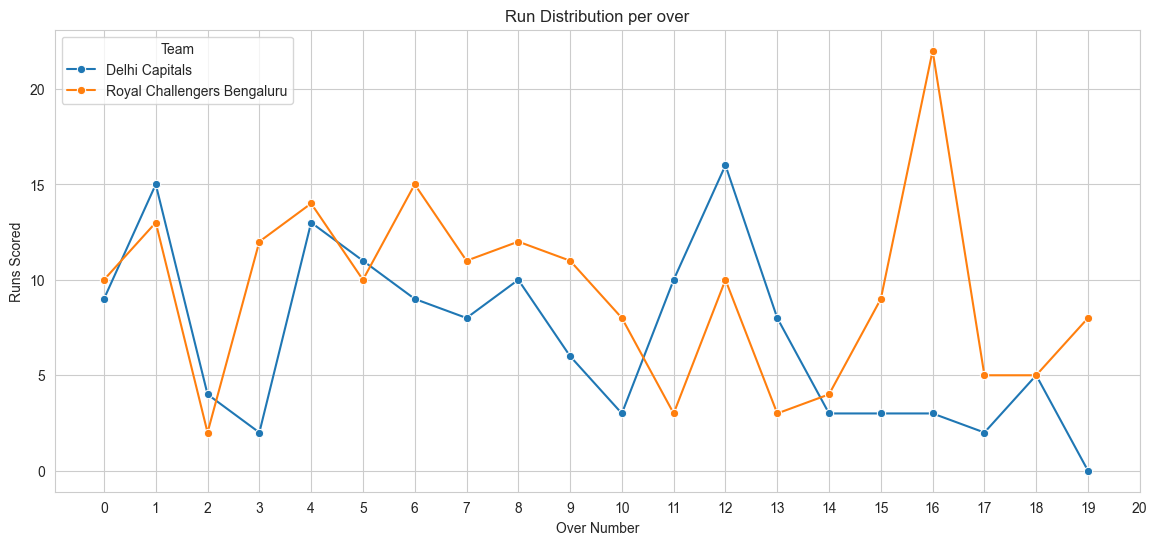

In [4]:
import matplotlib.pyplot as plt  
import seaborn as sns

sns.set_style("whitegrid")

run_distribution  = data.groupby(['team', 'over']).agg({'runs_total': 'sum'}).reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data = run_distribution, x='over', y='runs_total', hue='team', marker='o')
plt.title('Run Distribution per over')
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.xticks(range(0,21))
plt.legend(title='Team')
plt.show()

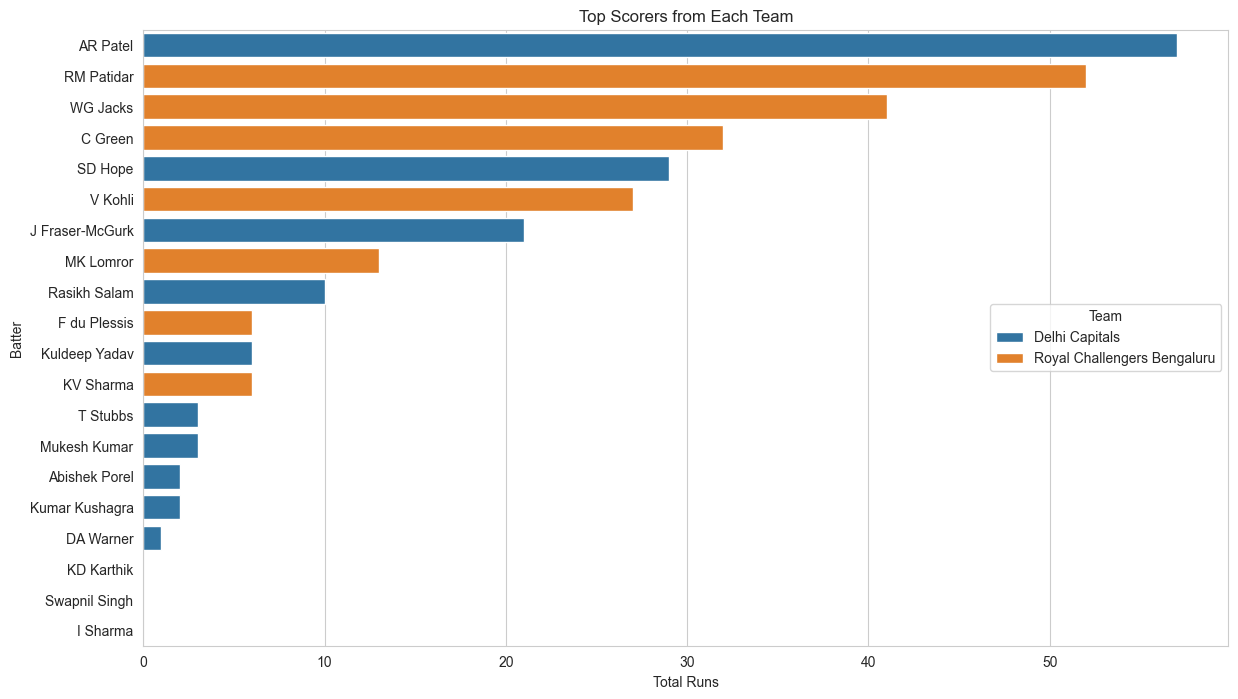

In [6]:
top_scorers = data.groupby(['team', 'batter']).agg({'runs_batter': 'sum'}).reset_index().sort_values(by='runs_batter', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_scorers, x='runs_batter', y='batter', hue='team', dodge=False)
plt.title('Top Scorers from Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.legend(title='Team', loc='center right')
plt.show()

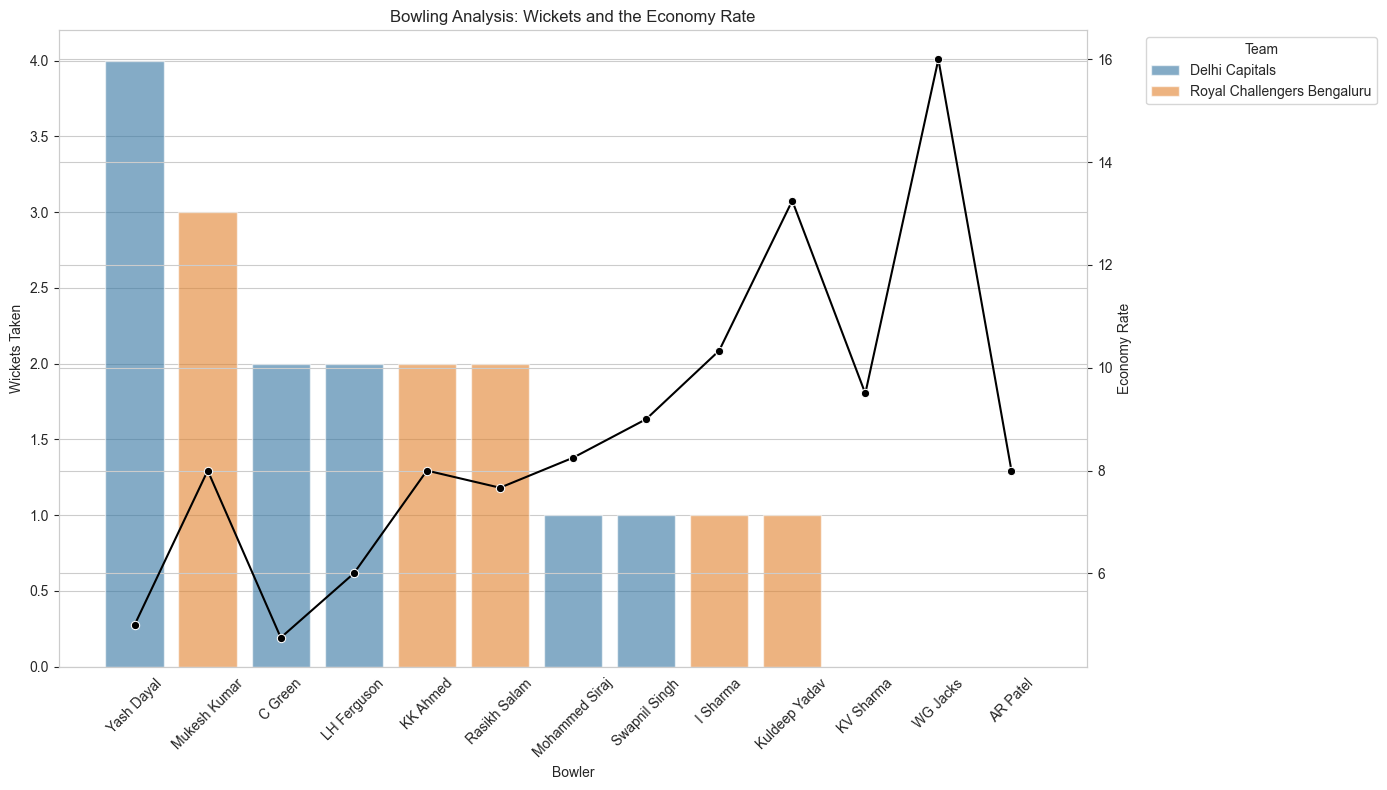

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a DataFrame that already exists with relevant columns

# Correcting the calculation of 'wickets_taken'
data['wickets_taken'] = data['wicket_kind'].notna().astype(int)

# Aggregating runs, wickets, and overs per team and bowler
bowling_stats = data.groupby(['team', 'bowler']).agg(
    {'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}
).reset_index()

# Calculating economy rate (runs per over)
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']

# Sorting bowlers by wickets taken in descending order
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

# Plotting the barplot for 'wickets_taken' with a line plot for 'economy_rate'
fig, ax1 = plt.subplots(figsize=(14,8))

# Creating the bar plot for 'wickets_taken'
sns.barplot(data=bowling_stats_sorted, x='bowler', y='wickets_taken', hue='team', ax=ax1, alpha=0.6)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler')
ax1.set_title('Bowling Analysis: Wickets and the Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotating x-axis tick labels for better readability
for item in ax1.get_xticklabels():
    item.set_rotation(45)

# Creating a secondary y-axis to plot the economy rate
ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


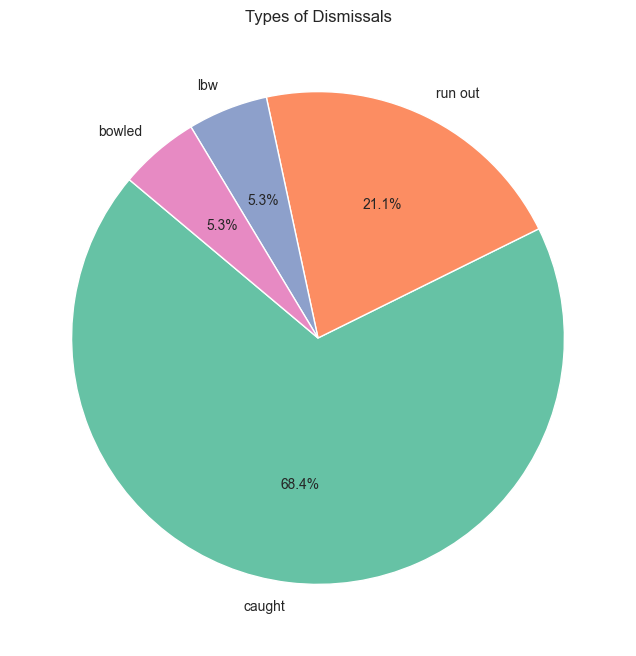

In [10]:
dismissal_types = data['wicket_kind'].dropna().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Types of Dismissals')
plt.show()

In [11]:
def calculate_partnership(df):
    partnerships = []
    current_partnership = {}
    for i, row in df.iterrows():
        if i == 0 or (row['batter'] not in current_partnership.values()):
            if current_partnership:
                partnerships.append(current_partnership)
            current_partnership = {
            'team': row['team'], 
            'batter1': row['batter'], 
            'batter2': row['non_striker'], 
            'runs': 0, 
            'balls': 0
            }
        current_partnership['runs'] += row['runs_total']
        current_partnership['balls'] += 1
        if 'player_out' in row and pd.notna(row['player_out']):
            if row['player_out'] == current_partnership['batter1'] or row['player_out'] ==  current_partnership['batter2']:
                partnerships.append(current_partnership)
                current_partnership = {}

    if current_partnership:
        partnerships.append(current_partnership)
    return partnerships

partnerships_data = calculate_partnerships(data) 
partnerships_df = pd.DataFrame(partnerships_data)

significant_partnerships = partnerships_df[partnership_df['runs'] > 20]  
significant_partnerships = significant_partnerships.sort_values(by='runs', ascending=False)

plt.Figure(figsize=(12,8))
sns.barplot(data=significant_partnerships, x='runs', y='batter1', hue='team', dodge=False)
plt.title('Significant Batting Partnerships')
plt.xlabel('Runs Scored')
plt.ylabel('batter 1 partnership initiated')
plt.legend(title='Team')
plt.show()

NameError: name 'calculate_partnerships' is not defined

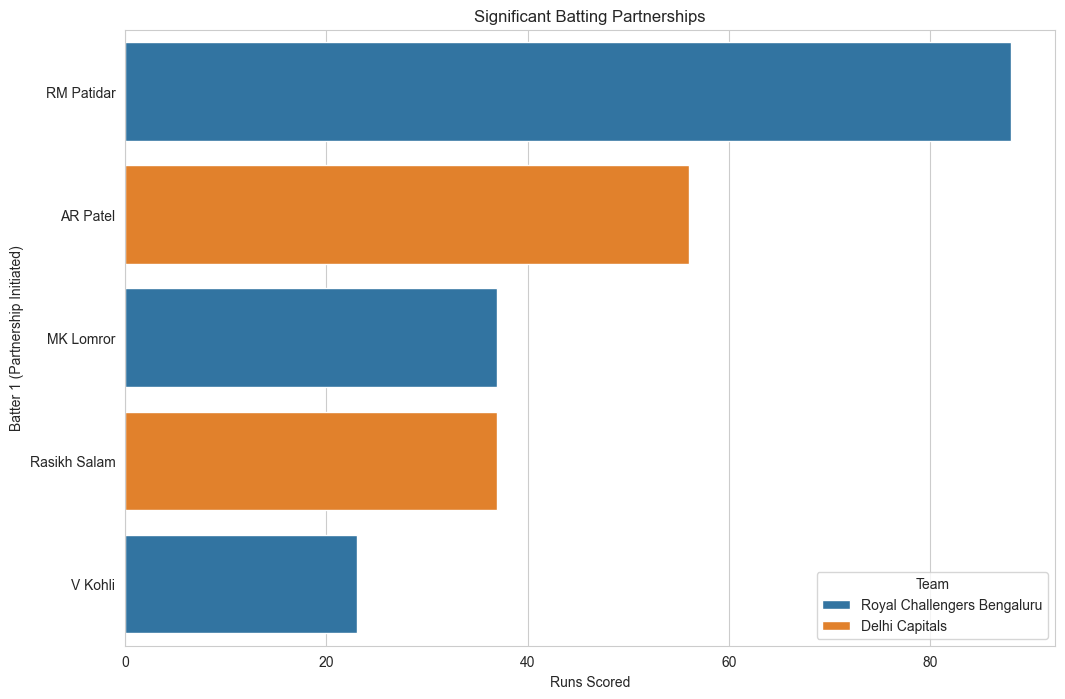

In [13]:
# function to calculate partnerships
def calculate_partnerships(df):
    partnerships = []
    current_partnership = {}
    for i, row in df.iterrows():
        if i == 0 or (row['batter'] not in current_partnership.values()):
            if current_partnership:
                partnerships.append(current_partnership)
            current_partnership = {
                'team': row['team'],
                'batter1': row['batter'],
                'batter2': row['non_striker'],
                'runs': 0,
                'balls': 0
            }
        current_partnership['runs'] += row['runs_total']
        current_partnership['balls'] += 1
        if 'player_out' in row and pd.notna(row['player_out']):
            if row['player_out'] == current_partnership['batter1'] or row['player_out'] == current_partnership['batter2']:
                partnerships.append(current_partnership)
                current_partnership = {}
    # append the last partnership if not ended by a wicket
    if current_partnership:
        partnerships.append(current_partnership)
    return partnerships

# calculate partnerships
partnerships_data = calculate_partnerships(data)
partnerships_df = pd.DataFrame(partnerships_data)

# filter out significant partnerships (e.g., partnerships with more than 20 runs)
significant_partnerships = partnerships_df[partnerships_df['runs'] > 20]

# sort by highest runs
significant_partnerships = significant_partnerships.sort_values(by='runs', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=significant_partnerships, x='runs', y='batter1', hue='team', dodge=False)
plt.title('Significant Batting Partnerships')
plt.xlabel('Runs Scored')
plt.ylabel('Batter 1 (Partnership Initiated)')
plt.legend(title='Team')
plt.show()

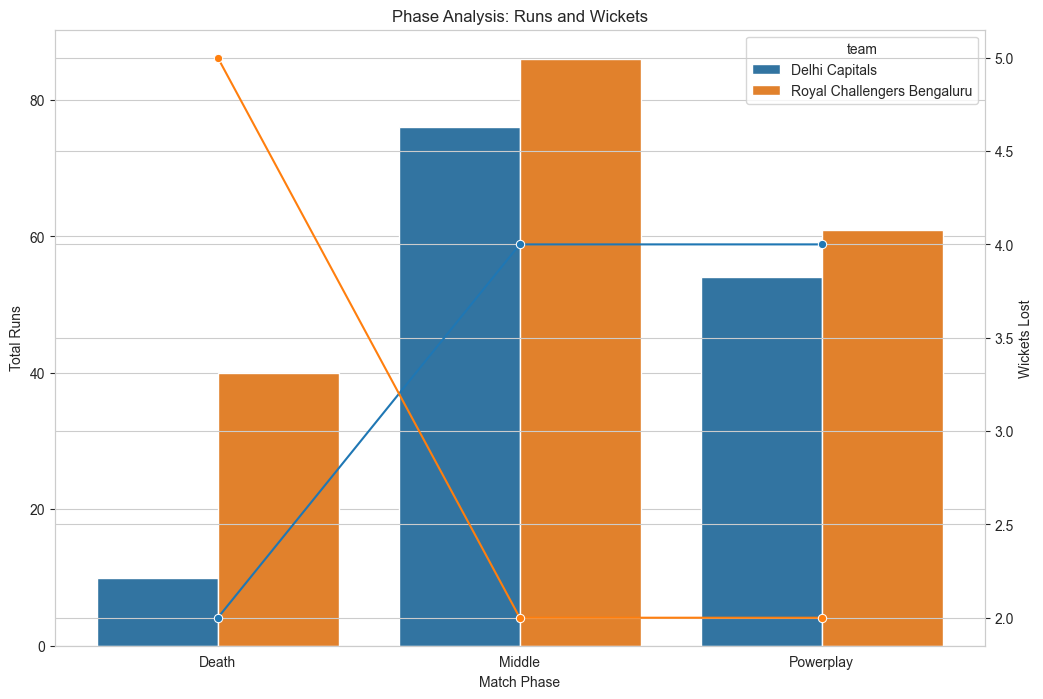

In [19]:
def classify_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'

# adding phase information to the dataframe
data['phase'] = data['over'].apply(classify_phase)

# grouping data by phase and team to calculate runs and wickets
phase_analysis = data.groupby(['team', 'phase']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'count'}).rename(columns={'over': 'balls'}).reset_index()

# calculating the run rate
phase_analysis['run_rate'] = (phase_analysis['runs_total'] / phase_analysis['balls']) * 6

# plotting the phase analysis
fig, ax1 = plt.subplots(figsize=(12, 8))

# bar plot for runs scored in each phase
sns.barplot(data=phase_analysis, x='phase', y='runs_total', hue='team', ax=ax1)
ax1.set_title('Phase Analysis: Runs and Wickets')
ax1.set_ylabel('Total Runs')
ax1.set_xlabel('Match Phase')

# line plot for wickets lost
ax2 = ax1.twinx()
sns.lineplot(data=phase_analysis, x='phase', y='wickets_taken', hue='team', marker='o', ax=ax2, legend=False)
ax2.set_ylabel('Wickets Lost')

plt.show()

In [20]:
batter_stats = deliveries.groupby('batter').agg({'runs_batter':'sum', 'over':'count'}).rename(columns={'over': 'balls_faced'}).reset_index()
batter_stats['striker_rate'] = (batter_stats['runs_batter'] / batter_stats['balls_faced'] * 100
batter_stats = batter_stats.sort_values(by='striker_rate', ascending=False)
batter_stats_sorted.head(10)

SyntaxError: invalid syntax (4025322240.py, line 3)

In [22]:
# Group the data by 'batter', and calculate total runs and balls faced
batter_stats = data.groupby('batter').agg({
    'runs_batter': 'sum', 
    'over': 'count'
}).rename(columns={'over': 'balls_faced'}).reset_index()

# Calculate the strike rate (runs per 100 balls)
batter_stats['striker_rate'] = (batter_stats['runs_batter'] / batter_stats['balls_faced']) * 100

# Sort the data by 'striker_rate' in descending order
batter_stats_sorted = batter_stats.sort_values(by='striker_rate', ascending=False)

# Display the top 10 batters by strike rate
batter_stats_sorted.head(10)


,batter,runs_batter,balls_faced,striker_rate
6,J Fraser-McGurk,21,8,262.500000
18,V Kohli,27,14,192.857143
13,RM Patidar,52,34,152.941176
8,KV Sharma,6,4,150.000000
0,AR Patel,57,40,142.500000
19,WG Jacks,41,30,136.666667
2,C Green,32,24,133.333333
11,MK Lomror,13,10,130.000000
15,SD Hope,29,24,120.833333
4,F du Plessis,6,7,85.714286


In [23]:
batter_phase_stats = data.groupby(['batter', 'phase'].agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

batter_phase_stats['strike_rate'] = (batter_phase_stats['runs_batter'] / batter_phase_stats['balls_faced']) * 100

top_performers = batter_stats_sorted.head(5)['batter'] 
batter_phase_stats_top = batter_phase_stats[batter_phase_stats]['batter'].isin(top_performers)] 

plt.figure(figsize=(10,6))
sns.barplot(data=batter_phase_stats_top, x='batter', y='strike_rate', hue='phase')
plt.title('strike rate across different phases of the top performers')
plt.xlabel('Batter')
plt.ylabel('Strike Rate') 
plt.legend(title='Match Phase')
plt.show()

SyntaxError: invalid syntax (2462099320.py, line 3)

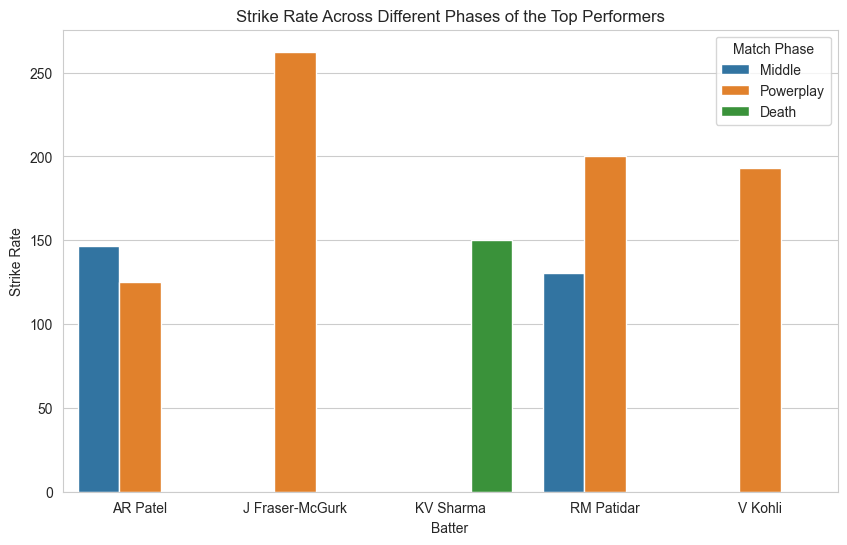

In [24]:
# Correct the groupby and fix the aggregation function and parentheses
batter_phase_stats = data.groupby(['batter', 'phase']).agg({
    'runs_batter': 'sum', 
    'over': 'count'
}).rename(columns={'over': 'balls_faced'}).reset_index()

# Calculate strike rate for each batter in each phase
batter_phase_stats['strike_rate'] = (batter_phase_stats['runs_batter'] / batter_phase_stats['balls_faced']) * 100

# Get the top 5 performers from batter_stats_sorted
top_performers = batter_stats_sorted.head(5)['batter']

# Filter batter_phase_stats for top performers
batter_phase_stats_top = batter_phase_stats[batter_phase_stats['batter'].isin(top_performers)]

# Plot the strike rate across different phases for top performers
plt.figure(figsize=(10,6))
sns.barplot(data=batter_phase_stats_top, x='batter', y='strike_rate', hue='phase')
plt.title('Strike Rate Across Different Phases of the Top Performers')
plt.xlabel('Batter')
plt.ylabel('Strike Rate') 
plt.legend(title='Match Phase')
plt.show()

In [25]:
data['cumulative_runs'] = data.groupby('team')['runs_total'].cumsum()
data['cumulative_wickets'] = data.groupby('team')['wickets_taken'].cumsum()
rcb_deliveries = data[data['team'] == 'Royal Challengers Bengaluru'] 
dc_deliveries = data[data['team']] == 'Delhi Capitals'] 

rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1)/ 6
dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6 

fig, ax = plt.subplots(figsize=(14,8))

ax.plot(rcb_deliveries['over_ball'], rcb_deliveries['cumulative_runs'], color='blue', label='RCB Runs')
ax.scatter(dc_delivries[dc_deliveries['wickets_taken'] == 1]['over_ball'], dc_deliveries[dc_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='red', marker='X', s=100)
ax.plot(dc_deliveries['over_ball'], dc_deliveries['cumulative_runs'], color='red', label='DC Runs')
ax.scatter(dc_deliveries[dc_deliveries[dc_deliveries['wickets_taken'] == 1]['over_ball'], dc_deliveries[dc_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='red', marker='X', s=100)

ax.set_title('Cumulative runs with wickets for RCB and DC')
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()
plt.show()

SyntaxError: unmatched ']' (16469481.py, line 4)

C:\Users\kaush\AppData\Local\Temp\ipykernel_27164\904508441.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1) / 6
C:\Users\kaush\AppData\Local\Temp\ipykernel_27164\904508441.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6


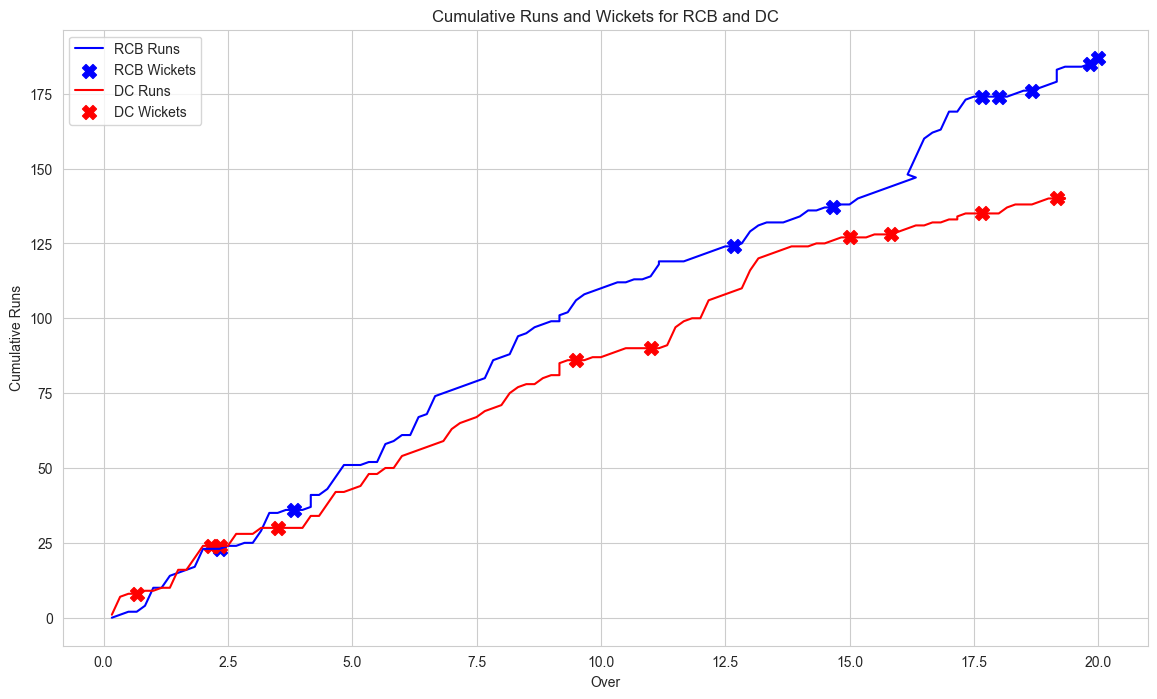

In [26]:
# Calculate cumulative runs and wickets for each team
data['cumulative_runs'] = data.groupby('team')['runs_total'].cumsum()
data['cumulative_wickets'] = data.groupby('team')['wickets_taken'].cumsum()

# Filter data for RCB and DC teams
rcb_deliveries = data[data['team'] == 'Royal Challengers Bengaluru']
dc_deliveries = data[data['team'] == 'Delhi Capitals']

# Create the over + ball fraction for each ball bowled
rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1) / 6
dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6

# Create the plot
fig, ax = plt.subplots(figsize=(14,8))

# Plot cumulative runs for RCB
ax.plot(rcb_deliveries['over_ball'], rcb_deliveries['cumulative_runs'], color='blue', label='RCB Runs')

# Mark wickets for DC on the same plot
ax.scatter(rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['over_ball'], 
           rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['cumulative_runs'], 
           color='blue', marker='X', s=100, label='RCB Wickets')

# Plot cumulative runs for DC
ax.plot(dc_deliveries['over_ball'], dc_deliveries['cumulative_runs'], color='red', label='DC Runs')

# Mark wickets for DC
ax.scatter(dc_deliveries[dc_deliveries['wickets_taken'] == 1]['over_ball'], 
           dc_deliveries[dc_deliveries['wickets_taken'] == 1]['cumulative_runs'], 
           color='red', marker='X', s=100, label='DC Wickets')

# Set the title and labels
ax.set_title('Cumulative Runs and Wickets for RCB and DC')
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()

# Display the plot
plt.show()


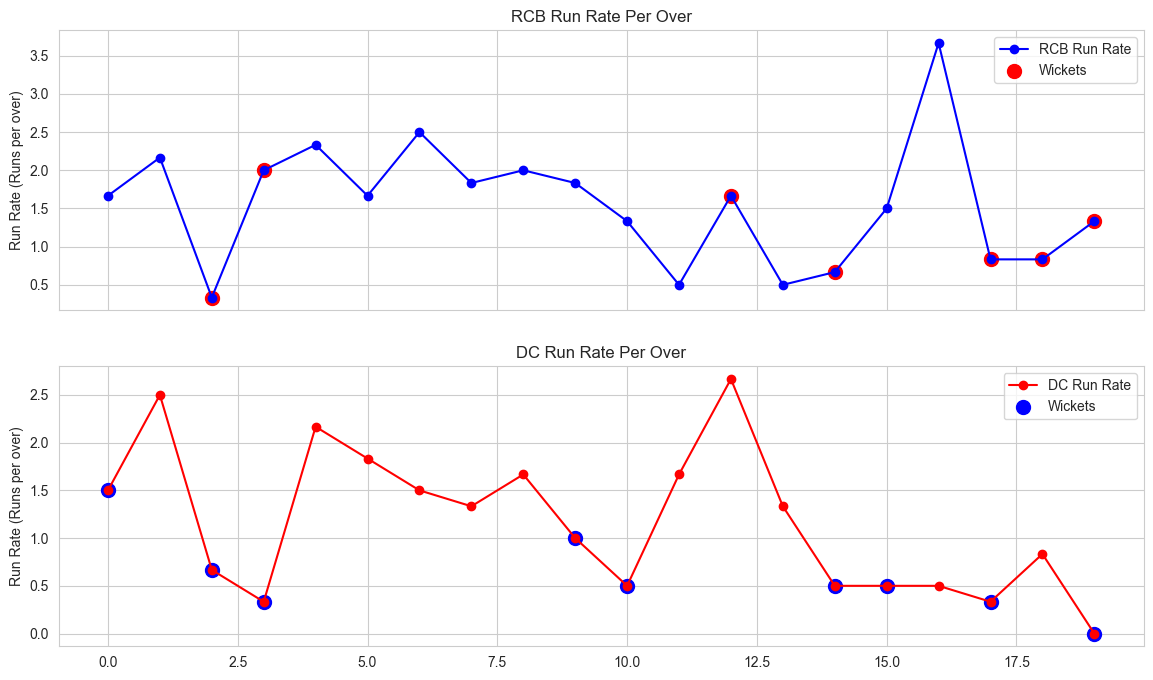

In [28]:
# Calculate per-over statistics for each team
per_over_stats = data.groupby(['team', 'over']).agg({'runs_total': 'sum', 'wickets_taken': 'sum'}).reset_index()

# Calculate run rate per over
per_over_stats['run_rate'] = per_over_stats['runs_total'] / 6

# Filter data for RCB and DC teams
rcb_per_over_stats = per_over_stats[per_over_stats['team'] == 'Royal Challengers Bengaluru']
dc_per_over_stats = per_over_stats[per_over_stats['team'] == 'Delhi Capitals']

# Create the plot with two subplots (one for each team)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,8), sharex=True)

# Plot RCB run rate and wickets
ax1.plot(rcb_per_over_stats['over'], rcb_per_over_stats['run_rate'], marker='o', color='blue', label='RCB Run Rate')
ax1.scatter(rcb_per_over_stats[rcb_per_over_stats['wickets_taken'] > 0]['over'], 
            rcb_per_over_stats[rcb_per_over_stats['wickets_taken'] > 0]['run_rate'], 
            color='red', s=100, label='Wickets')
ax1.set_title('RCB Run Rate Per Over')
ax1.set_ylabel('Run Rate (Runs per over)')
ax1.legend()

# Plot DC run rate and wickets
ax2.plot(dc_per_over_stats['over'], dc_per_over_stats['run_rate'], marker='o', color='red', label='DC Run Rate')
ax2.scatter(dc_per_over_stats[dc_per_over_stats['wickets_taken'] > 0]['over'], 
            dc_per_over_stats[dc_per_over_stats['wickets_taken'] > 0]['run_rate'], 
            color='blue', s=100, label='Wickets')
ax2.set_title('DC Run Rate Per Over')
ax2.set_ylabel('Run Rate (Runs per over)')
ax2.legend()

# Display the plot
plt.show()
